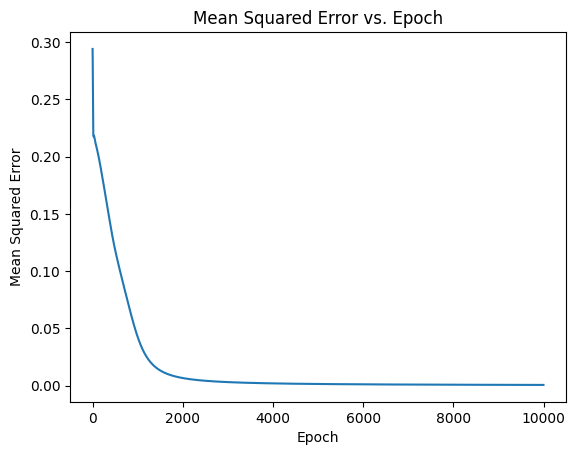

4/4 [==============================] - 0s 3ms/step
Errors in the neural net solution: [0.   0.07]


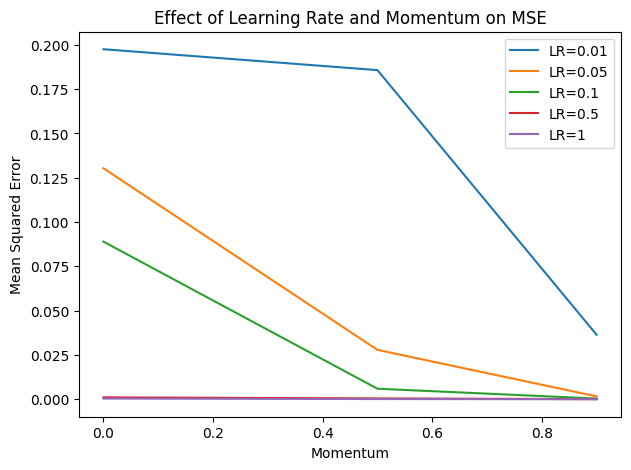

In [2]:
#Full code sammple 2(includes part 7)


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Set random seed for reproducibility
np.random.seed(42)

# Define the training data for the half adder with some noise
input_data = np.array([[0,0], [0,1], [1,0], [1,1]])
noise = np.random.uniform(-0.2, 0.2, input_data.shape)
noisy_input = input_data + noise
output_data = np.array([[0,0], [1,0], [1,0], [0,1]]) # sum, carry

# Define the model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='sigmoid')) # Hidden layer with 4 neurons
model.add(Dense(2, activation='sigmoid')) # Output layer with 2 neurons (sum, carry)

# Compile the model
sgd = SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=sgd)

# Train the model
epochs = 10000
history = model.fit(noisy_input, output_data, epochs=epochs, verbose=0)

# Plot the MSE vs Epochs
plt.plot(history.history['loss'])
plt.title('Mean Squared Error vs. Epoch')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

# Generate 100 test values with noise
test_noise = np.random.uniform(-0.2, 0.2, (100, 2))
test_input = np.round(np.random.rand(100, 2)) # Original binary inputs before noise
rounded_test_input = np.round(test_input).astype(int)
noisy_test_input = test_input + test_noise

# Record the outputs
predicted_output = model.predict(noisy_test_input)
rounded_output = np.round(predicted_output)

# Find the errors
test_output = np.array([
    rounded_test_input[:, 0] ^ rounded_test_input[:, 1],  # XOR for sum
    rounded_test_input[:, 0] & rounded_test_input[:, 1]   # AND for carry
]).T  # Transpose to get the correct shape
errors = np.mean(np.square(rounded_output - test_output), axis=0)
print(f'Errors in the neural net solution: {errors}')

# Investigate the effect of learning rate and momentum term
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
momentum_values = [0.0, 0.5, 0.9]

# Store MSE for each configuration
mse_values = {}

for lr in learning_rates:
    for momentum in momentum_values:
        # Define the model
        model = Sequential()
        model.add(Dense(4, input_dim=2, activation='sigmoid'))
        model.add(Dense(2, activation='sigmoid'))

        # Compile the model
        sgd = SGD(learning_rate=lr, momentum=momentum)
        model.compile(loss='mean_squared_error', optimizer=sgd)

        # Train the model
        history = model.fit(noisy_input, output_data, epochs=epochs, verbose=0)

        # Record the MSE for the last epoch
        mse_values[(lr, momentum)] = history.history['loss'][-1]

# Plot the results
plt.figure(figsize=(7, 5))
for lr in learning_rates:
    lr_values = [mse_values[(lr, m)] for m in momentum_values]
    plt.plot(momentum_values, lr_values, label=f'LR={lr}')

plt.title('Effect of Learning Rate and Momentum on MSE')
plt.xlabel('Momentum')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
